In [174]:
%reset

In [176]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [177]:
# Define the stock symbol and time frame
stock_symbol = "^NSEI"
start_date = "2013-01-01"
end_date = "2023-10-07"

# Download historical stock price data
data = yf.download(stock_symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [178]:
# Extract the closing price
df = data[['Close']]

In [179]:
# Normalize the data
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))


/tmp/ipykernel_15719/2709058209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))


In [180]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]


In [181]:
# Create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length:i+seq_length+1]
        sequences.append((sequence, target))
    return sequences


In [182]:
seq_length = 10  # You can adjust this value
train_sequences = create_sequences(train_data.values, seq_length)
test_sequences = create_sequences(test_data.values, seq_length)


In [183]:
# Create the LSTM model
model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1)
])


In [184]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [185]:
# Train the model
X_train, y_train = zip(*train_sequences)

In [186]:

X_train, y_train = np.array(X_train), np.array(y_train)

In [187]:

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
66/66 [==============================] - 3s 10ms/step - loss: 0.0115
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 2.5723e-04
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 2.1101e-04
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 2.0059e-04
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 1.9154e-04
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 1.9155e-04
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 1.8860e-04
Epoch 8/10
66/66 [==============================] - 1s 8ms/step - loss: 1.7919e-04
Epoch 9/10
66/66 [==============================] - 1s 9ms/step - loss: 1.7864e-04
Epoch 10/10
66/66 [==============================] - 1s 8ms/step - loss: 1.8132e-04


In [188]:
# Evaluate the model
X_test, y_test = zip(*test_sequences)
X_test, y_test = np.array(X_test), np.array(y_test)
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

17/17 [==============================] - 1s 5ms/step - loss: 4.0670e-04
Test loss: 0.00040669634472578764


In [189]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


17/17 [==============================] - 1s 5ms/step


In [190]:
# Visualize the predictions
import matplotlib.pyplot as plt


In [191]:
inversed_test_data = scaler.inverse_transform(test_data)
inversed_test_df = pd.DataFrame(inversed_test_data, columns=['Close'], index=test_data.index)
test_data = inversed_test_df

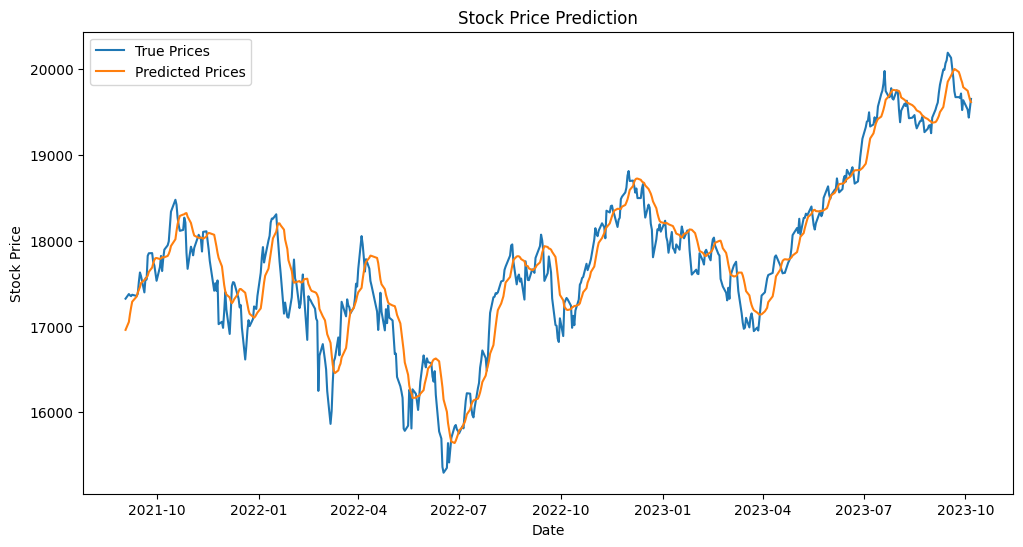

In [192]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length:], test_data.values[seq_length:], label='True Prices')
plt.plot(test_data.index[seq_length:], predictions, label='Predicted Prices')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()
